Data Analysis relationshoip between of NOx emission and concentration

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Please change the path to your 2019 emissions summary file
#I convert the file to csv only because excel works super slow on my computer
emission_summary = pd.read_csv('datasets/LAEI-2019-Emissions-Summary-including-Forecast.csv')
emission_summary.head(5)

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum


In [3]:
emissions2019 = emission_summary[(emission_summary['Year'] == 2019)]
unqiue_data = emissions2019['Year'].unique()
unqiue_data

array([2019])

In [4]:
rename_emission2019 = emissions2019.rename(columns={'Easting': 'x', 'Northing': 'y'})
emissions2019.shape

(143976, 30)

In [5]:
conc_nox = pd.read_csv('datasets/laei_LAEI2019v3_CorNOx15_NOx.csv')
conc_no2 = pd.read_csv('datasets/laei_LAEI2019v3_CorNOx15_NO2.csv')
conc_pm10 = pd.read_csv('datasets/laei_LAEI2019v3_CorNOx15_PM10m.csv')
conc_pm25 = pd.read_csv('datasets/laei_LAEI2019v3_CorNOx15_PM25.csv')

In [6]:
print(
    f"Shape of conc_nox: {conc_nox.shape}\n"
    f"Shape of conc_no2: {conc_no2.shape}\n"
    f"Shape of conc_pm10: {conc_pm10.shape}\n"
    f"Shape of conc_pm25: {conc_pm25.shape}"
)

Shape of conc_nox: (5851964, 3)
Shape of conc_no2: (5851964, 3)
Shape of conc_pm10: (5851964, 3)
Shape of conc_pm25: (5851964, 3)


In [7]:
# Rename the 'conc' column in each dataset
conc_nox.rename(columns={'conc': 'conc_NOx'}, inplace=True)
conc_no2.rename(columns={'conc': 'conc_NO2'}, inplace=True)
conc_pm10.rename(columns={'conc': 'conc_PM10'}, inplace=True)
conc_pm25.rename(columns={'conc': 'conc_PM25'}, inplace=True)

# Print the first few rows of each dataset to confirm the change
print(conc_nox.head())
print(conc_no2.head())
print(conc_pm10.head())
print(conc_pm25.head())

        x       y  conc_NOx
0  519100  203440  37.54391
1  519120  203440  40.60276
2  519140  203440  47.19806
3  519160  203440  43.32369
4  519180  203440  39.57808
        x       y  conc_NO2
0  519100  203440  23.50290
1  519120  203440  24.58045
2  519140  203440  26.86432
3  519160  203440  25.52398
4  519180  203440  24.20996
        x       y  conc_PM10
0  519100  203440   15.09522
1  519120  203440   15.51029
2  519140  203440   16.40831
3  519160  203440   15.87096
4  519180  203440   15.34885
        x       y  conc_PM25
0  519100  203440   9.567125
1  519120  203440   9.687501
2  519140  203440   9.953107
3  519160  203440   9.791943
4  519180  203440   9.635820


In [8]:
merged_conc_data = conc_nox.merge(conc_no2, on=['x', 'y']) \
                      .merge(conc_pm10, on=['x', 'y']) \
                      .merge(conc_pm25, on=['x', 'y'])
print(merged_conc_data.head(5))
print(merged_conc_data.shape)

        x       y  conc_NOx  conc_NO2  conc_PM10  conc_PM25
0  519100  203440  37.54391  23.50290   15.09522   9.567125
1  519120  203440  40.60276  24.58045   15.51029   9.687501
2  519140  203440  47.19806  26.86432   16.40831   9.953107
3  519160  203440  43.32369  25.52398   15.87096   9.791943
4  519180  203440  39.57808  24.20996   15.34885   9.635820
(5851964, 6)


The emissions2019 has 143976 rows while the concentrations has 5851964 rows. This is because the concentration data is recorded at a finer spatial resolution (20m grid resolution vs. 1km grid square resolution). 

In [9]:
merged_data = pd.merge(rename_emission2019, merged_conc_data, on =['x','y'], how= 'inner')
print(merged_data.head(5))
print(merged_data.shape)

   Year  Grid ID 2019  LAEI 1km2 ID       x       y  Borough     Zone  \
0  2019            10          6081  509500  202500  Non GLA  Non GLA   
1  2019            11          6082  510500  202500  Non GLA  Non GLA   
2  2019            12          6083  511500  202500  Non GLA  Non GLA   
3  2019            13          6084  512500  202500  Non GLA  Non GLA   
4  2019            14          6085  513500  202500  Non GLA  Non GLA   

  Main Source Category   Sector        Source  ...  pb  pcb      pm10  \
0             Domestic  Biomass  Wood Burning  ... NaN  NaN  0.113548   
1             Domestic  Biomass  Wood Burning  ... NaN  NaN  0.048413   
2             Domestic  Biomass  Wood Burning  ... NaN  NaN  0.022535   
3             Domestic  Biomass  Wood Burning  ... NaN  NaN  0.032564   
4             Domestic  Biomass  Wood Burning  ... NaN  NaN  0.060357   

      pm2.5  so2  Emissions Unit  conc_NOx  conc_NO2  conc_PM10  conc_PM25  
0  0.113548  NaN    tonnes/annum  26.09821  1

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137910 entries, 0 to 137909
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  137910 non-null  int64  
 1   Grid ID 2019          137910 non-null  int64  
 2   LAEI 1km2 ID          137910 non-null  int64  
 3   x                     137910 non-null  int64  
 4   y                     137910 non-null  int64  
 5   Borough               137910 non-null  object 
 6   Zone                  137910 non-null  object 
 7   Main Source Category  137910 non-null  object 
 8   Sector                137910 non-null  object 
 9   Source                137910 non-null  object 
 10  bap                   29835 non-null   float64
 11  cd                    16575 non-null   float64
 12  c4h6                  33150 non-null   float64
 13  c6h6                  43095 non-null   float64
 14  ch4                   49725 non-null   float64
 15  

In [11]:
merged_data.to_csv('merged_data_concetration_summary.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137910 entries, 0 to 137909
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  137910 non-null  int64  
 1   Grid ID 2019          137910 non-null  int64  
 2   LAEI 1km2 ID          137910 non-null  int64  
 3   x                     137910 non-null  int64  
 4   y                     137910 non-null  int64  
 5   Borough               137910 non-null  object 
 6   Zone                  137910 non-null  object 
 7   Main Source Category  137910 non-null  object 
 8   Sector                137910 non-null  object 
 9   Source                137910 non-null  object 
 10  bap                   29835 non-null   float64
 11  cd                    16575 non-null   float64
 12  c4h6                  33150 non-null   float64
 13  c6h6                  43095 non-null   float64
 14  ch4                   49725 non-null   float64
 15  

In [12]:
#Clean the columns
col_to_drop = ['Grid ID 2019','LAEI 1km2 ID','bap','cd','c4h6','c6h6',
               'ch4','co','co2','hc','hcl','hg','n2o','nh3','nmvoc',
               'pb','pcb','so2','Emissions Unit']
clean_data = merged_data.drop(columns=col_to_drop)
clean_data.head(5)

,Year,x,y,Borough,Zone,Main Source Category,Sector,Source,nox,pm10,pm2.5,conc_NOx,conc_NO2,conc_PM10,conc_PM25
0,2019,509500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,NaN,0.113548,0.113548,26.09821,19.27811,13.16673,9.132265
1,2019,510500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,NaN,0.048413,0.048413,25.48599,19.25023,12.98150,9.039471
2,2019,511500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,NaN,0.022535,0.022535,26.44346,19.83410,13.00581,9.066235
3,2019,512500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,NaN,0.032564,0.032564,27.99726,20.37540,13.34289,9.210483
4,2019,513500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,NaN,0.060357,0.060357,30.60220,21.22061,13.81937,9.251517


In [13]:
clean_data[['nox','pm10','pm2.5','conc_NOx','conc_NO2','conc_PM10','conc_PM25']].describe()

,nox,pm10,pm2.5,conc_NOx,conc_NO2,conc_PM10,conc_PM25
count,118020.000000,134595.000000,134595.000000,137910.000000,137910.000000,137910.000000,137910.000000
mean,0.360092,0.064948,0.028878,37.848242,25.110811,15.414833,10.197908
std,4.683387,0.704482,0.175601,15.420628,5.853568,2.591527,0.980566
min,0.000000,0.000000,0.000000,20.233480,16.566730,12.215170,8.835211
25%,0.000000,0.000000,0.000000,28.317600,20.873780,13.702890,9.497413
50%,0.001789,0.000838,0.000483,34.883620,24.103170,14.933130,10.066390
75%,0.098958,0.019089,0.010925,42.658240,27.789940,16.303560,10.615150
max,1000.194271,114.906839,21.364992,279.093700,82.963260,45.239320,20.049840


In [14]:
# % of missing values
clean_data.isna().mean() * 100

Year                     0.000000
x                        0.000000
y                        0.000000
Borough                  0.000000
Zone                     0.000000
Main Source Category     0.000000
Sector                   0.000000
Source                   0.000000
nox                     14.422449
pm10                     2.403742
pm2.5                    2.403742
conc_NOx                 0.000000
conc_NO2                 0.000000
conc_PM10                0.000000
conc_PM25                0.000000
dtype: float64

In [15]:
relevant_columns = ['co2', 'nox', 'pm10', 'pm2.5', 'conc_NOx', 'conc_NO2', 'conc_PM10', 'conc_PM25']
correlation_matrix = merged_data[relevant_columns].corr()
print(correlation_matrix)

                co2       nox      pm10     pm2.5  conc_NOx  conc_NO2  \
co2        1.000000  0.840773  0.350502  0.376810  0.030000  0.033997   
nox        0.840773  1.000000  0.493637  0.503665  0.040528  0.045061   
pm10       0.350502  0.493637  1.000000  0.588519  0.042796  0.047089   
pm2.5      0.376810  0.503665  0.588519  1.000000  0.073308  0.081891   
conc_NOx   0.030000  0.040528  0.042796  0.073308  1.000000  0.970976   
conc_NO2   0.033997  0.045061  0.047089  0.081891  0.970976  1.000000   
conc_PM10  0.028911  0.032484  0.067162  0.086380  0.949222  0.951046   
conc_PM25  0.031251  0.034423  0.053028  0.090815  0.925349  0.962760   

           conc_PM10  conc_PM25  
co2         0.028911   0.031251  
nox         0.032484   0.034423  
pm10        0.067162   0.053028  
pm2.5       0.086380   0.090815  
conc_NOx    0.949222   0.925349  
conc_NO2    0.951046   0.962760  
conc_PM10   1.000000   0.963600  
conc_PM25   0.963600   1.000000  


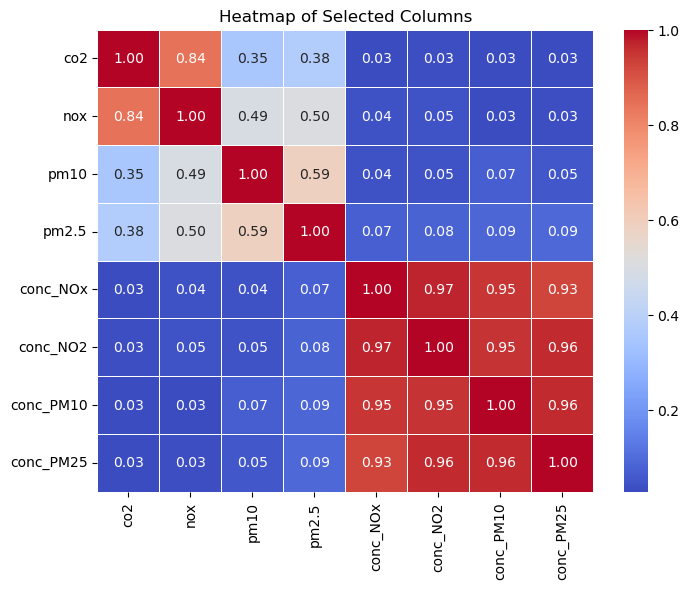

In [18]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()

In [19]:
#log transformation to the emissions data to reduce the impact of extreme values
merged_data['log_co2'] = np.log1p(merged_data['co2'])
merged_data['log_nox'] = np.log1p(merged_data['nox'])
merged_data['log_pm10'] = np.log1p(merged_data['pm10'])
merged_data['log_pm2.5'] = np.log1p(merged_data['pm2.5'])
merged_data.head(5)

,Year,Grid ID 2019,LAEI 1km2 ID,x,y,Borough,Zone,Main Source Category,Sector,Source,...,so2,Emissions Unit,conc_NOx,conc_NO2,conc_PM10,conc_PM25,log_co2,log_nox,log_pm10,log_pm2.5
0,2019,10,6081,509500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,tonnes/annum,26.09821,19.27811,13.16673,9.132265,NaN,NaN,0.107551,0.107551
1,2019,11,6082,510500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,tonnes/annum,25.48599,19.25023,12.98150,9.039471,NaN,NaN,0.047277,0.047277
2,2019,12,6083,511500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,tonnes/annum,26.44346,19.83410,13.00581,9.066235,NaN,NaN,0.022285,0.022285
3,2019,13,6084,512500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,tonnes/annum,27.99726,20.37540,13.34289,9.210483,NaN,NaN,0.032045,0.032045
4,2019,14,6085,513500,202500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,tonnes/annum,30.60220,21.22061,13.81937,9.251517,NaN,NaN,0.058606,0.058606


In [20]:
relevant_columns = ['log_co2', 'log_nox', 'log_pm10', 'log_pm2.5', 'conc_NOx', 'conc_NO2', 'conc_PM10', 'conc_PM25']
log_correlation_matrix = merged_data[relevant_columns].corr()
print(log_correlation_matrix)

            log_co2   log_nox  log_pm10  log_pm2.5  conc_NOx  conc_NO2  \
log_co2    1.000000  0.751837  0.578025   0.528164  0.112066  0.124908   
log_nox    0.751837  1.000000  0.733704   0.703402  0.139299  0.152077   
log_pm10   0.578025  0.733704  1.000000   0.773174  0.114728  0.123850   
log_pm2.5  0.528164  0.703402  0.773174   1.000000  0.111905  0.123619   
conc_NOx   0.112066  0.139299  0.114728   0.111905  1.000000  0.970976   
conc_NO2   0.124908  0.152077  0.123850   0.123619  0.970976  1.000000   
conc_PM10  0.114287  0.138985  0.126693   0.123129  0.949222  0.951046   
conc_PM25  0.121220  0.143981  0.124918   0.129404  0.925349  0.962760   

           conc_PM10  conc_PM25  
log_co2     0.114287   0.121220  
log_nox     0.138985   0.143981  
log_pm10    0.126693   0.124918  
log_pm2.5   0.123129   0.129404  
conc_NOx    0.949222   0.925349  
conc_NO2    0.951046   0.962760  
conc_PM10   1.000000   0.963600  
conc_PM25   0.963600   1.000000  


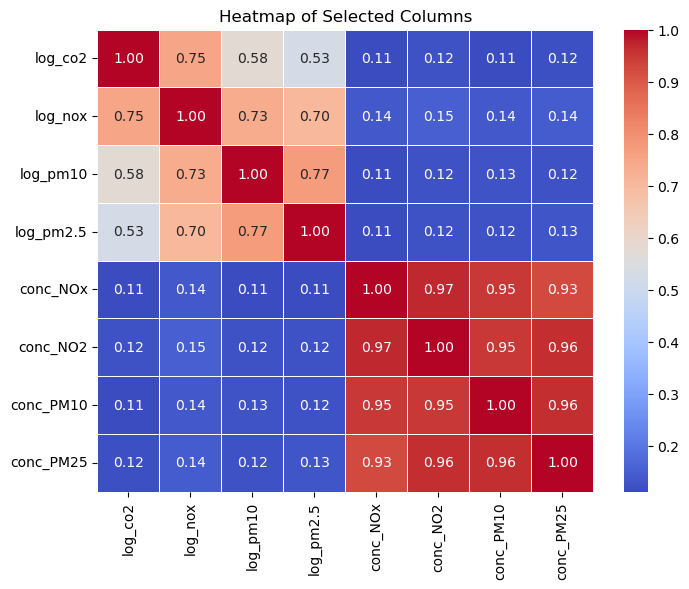

In [23]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(log_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()